# Python interface prototype

This notebook contains a small demo for using Europeana Search and Record APIs with python

You can find more details about the search and the record APIs in the following links:

*   [Search API](https://pro.europeana.eu/page/search)
*   [Record API](https://pro.europeana.eu/page/record)

Those APIs serve data using the [Europeana Data Model](https://pro.europeana.eu/page/intro#edm).

The updated implementation of the python interface is in this [Github repository](https://github.com/europeana/rd-europeana-python-api.git)




In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

#!pip install pyeuropeana

import os
os.environ['EUROPEANA_API_KEY'] = 'api2demo'

import pyeuropeana.apis as apis
import pyeuropeana.utils as utils

response = apis.search(
    query = '*',
    qf = 'TYPE:IMAGE',
    rows = 100
)

print(response['totalResults'])
print(response['url'])

save_dir = Path('tmp')

35435353
https://api.europeana.eu/record/v2/search.json?wskey=api2demo&query=%2A&qf=TYPE%3AIMAGE&sort=europeana_id&rows=100&cursor=%2A


## Using the Search API









An API key is necessary for using Europeana APIs, you can find how to obtain one here https://pro.europeana.eu/pages/get-api

For this experiment we will use the key 'api2demo'

In [2]:
response = apis.search(
    query = '*',
    qf = 'TYPE:IMAGE',
    reusability = 'open AND permission',
    rows = 10
)

for CHO in response['items']:
  CHO = utils.process_CHO_search(CHO)
  print('europeana_id: ', CHO['europeana_id'])
  print('uri: ', CHO['uri'])
  print('country: ', CHO['country'])
  print('title: ', CHO['title'])
  print('language: ', CHO['language'])
  print('rights: ', CHO['rights'])
  print('type: ', CHO['type'])
  print('image_url: ', CHO['image_url']) # edmIsShownBy
  print('description: ', CHO['description']) # dcDescription
  print('creator: ', CHO['creator']) # dcCreator
  print('provider: ', CHO['provider']) # dataProvider
  print('dataset_name: ', CHO['dataset_name']) # edmDatasetName
  print('concept: ', CHO['concept']) # edmConcept
  print('concept_lang: ', CHO['concept_lang']) # edmConceptPrefLabelLangAware
  print('description_lang: ', CHO['description_lang']) # dcDescriptionLangAware
  print('title_lang: ', CHO['title_lang']) # dcDescriptionLangAware


  print(50*'**')

europeana_id:  /92085/9999
uri:  http://data.europeana.eu/item/92085/9999
country:  Latvia
title:  Strenči. Pulkveža Zemitāna iela
language:  mul
rights:  http://creativecommons.org/licenses/by/4.0/
type:  IMAGE
image_url:  http://dom.lndb.lv/data/obj/file/35902
description:  None
creator:  None
provider:  Museum of the History of Riga and Navigation
dataset_name:  92085_National_Library_of_Latvia
concept:  None
concept_lang:  None
description_lang:  None
title_lang:  {'lv': 'Strenči. Pulkveža Zemitāna iela'}
****************************************************************************************************
europeana_id:  /92085/9998
uri:  http://data.europeana.eu/item/92085/9998
country:  Latvia
title:  Strenči, apkārtnes skats
language:  mul
rights:  http://creativecommons.org/licenses/by/4.0/
type:  IMAGE
image_url:  http://dom.lndb.lv/data/obj/file/35899
description:  None
creator:  None
provider:  Museum of the History of Riga and Navigation
dataset_name:  92085_National_Library_

In [3]:
response['params']

{'wskey': 'api2demo',
 'query': '*',
 'qf': 'TYPE:IMAGE',
 'reusability': 'open AND permission',
 'media': None,
 'thumbnail': None,
 'landingpage': None,
 'colourpalette': None,
 'theme': None,
 'sort': 'europeana_id',
 'profile': None,
 'rows': 10,
 'cursor': 'AoErLzkyMDg1Lzk5OTA=',
 'callback': None,
 'facet': None}

In [4]:
response['url']

'https://api.europeana.eu/record/v2/search.json?wskey=api2demo&query=%2A&qf=TYPE%3AIMAGE&reusability=open+AND+permission&sort=europeana_id&rows=10&cursor=%2A'

In [5]:
df = utils.resp2df(response)
df

,europeana_id,uri,type,image_url,country,description,title,creator,language,rights,provider,dataset_name,concept,concept_lang,description_lang,title_lang
0,/92085/9999,http://data.europeana.eu/item/92085/9999,IMAGE,http://dom.lndb.lv/data/obj/file/35902,Latvia,None,Strenči. Pulkveža Zemitāna iela,None,mul,http://creativecommons.org/licenses/by/4.0/,Museum of the History of Riga and Navigation,92085_National_Library_of_Latvia,None,None,None,{'lv': 'Strenči. Pulkveža Zemitāna iela'}
1,/92085/9998,http://data.europeana.eu/item/92085/9998,IMAGE,http://dom.lndb.lv/data/obj/file/35899,Latvia,None,"Strenči, apkārtnes skats",None,mul,http://creativecommons.org/licenses/by/4.0/,Museum of the History of Riga and Navigation,92085_National_Library_of_Latvia,None,None,None,"{'lv': 'Strenči, apkārtnes skats'}"
2,/92085/9997,http://data.europeana.eu/item/92085/9997,IMAGE,http://dom.lndb.lv/data/obj/file/35897,Latvia,None,Kokmateriālu sagatavošana,None,mul,http://creativecommons.org/licenses/by/4.0/,Museum of the History of Riga and Navigation,92085_National_Library_of_Latvia,None,None,None,{'lv': 'Kokmateriālu sagatavošana'}
3,/92085/9996,http://data.europeana.eu/item/92085/9996,IMAGE,http://dom.lndb.lv/data/obj/file/35894,Latvia,None,Strenči. Vecais tilts pār Strenčupīti,None,mul,http://creativecommons.org/licenses/by/4.0/,Museum of the History of Riga and Navigation,92085_National_Library_of_Latvia,None,None,None,{'lv': 'Strenči. Vecais tilts pār Strenčupīti'}
4,/92085/9995,http://data.europeana.eu/item/92085/9995,IMAGE,http://dom.lndb.lv/data/obj/file/35892,Latvia,None,Ceļa būve,None,mul,http://creativecommons.org/licenses/by/4.0/,Museum of the History of Riga and Navigation,92085_National_Library_of_Latvia,None,None,None,{'lv': 'Ceļa būve'}
5,/92085/9994,http://data.europeana.eu/item/92085/9994,IMAGE,http://dom.lndb.lv/data/obj/file/35889,Latvia,None,Srenči. Iespējams tilta būvniecība pār Strenču...,None,mul,http://creativecommons.org/licenses/by/4.0/,Museum of the History of Riga and Navigation,92085_National_Library_of_Latvia,None,None,None,{'lv': 'Srenči. Iespējams tilta būvniecība pār...
6,/92085/9993,http://data.europeana.eu/item/92085/9993,IMAGE,http://dom.lndb.lv/data/obj/file/35886,Latvia,None,Strenču apkārtne,None,mul,http://creativecommons.org/licenses/by/4.0/,Museum of the History of Riga and Navigation,92085_National_Library_of_Latvia,None,None,None,{'lv': 'Strenču apkārtne'}
7,/92085/9992,http://data.europeana.eu/item/92085/9992,IMAGE,http://dom.lndb.lv/data/obj/file/35883,Latvia,None,Gauja pie Strenčiem,None,mul,http://creativecommons.org/licenses/by/4.0/,Museum of the History of Riga and Navigation,92085_National_Library_of_Latvia,None,None,None,{'lv': 'Gauja pie Strenčiem'}
8,/92085/9991,http://data.europeana.eu/item/92085/9991,IMAGE,http://dom.lndb.lv/data/obj/file/35880,Latvia,None,Lauku sēta,None,mul,http://creativecommons.org/licenses/by/4.0/,Museum of the History of Riga and Navigation,92085_National_Library_of_Latvia,http://data.europeana.eu/concept/base/134,"{'de': 'Landwirtschaft', 'hi': 'कृषि', 'no': '...",None,{'lv': 'Lauku sēta'}
9,/92085/9990,http://data.europeana.eu/item/92085/9990,IMAGE,http://dom.lndb.lv/data/obj/file/35877,Latvia,None,Strenči. Ugunsdzēsēju sacensības,None,mul,http://creativecommons.org/licenses/by/4.0/,Museum of the History of Riga and Navigation,92085_National_Library_of_Latvia,None,None,None,{'lv': 'Strenči. Ugunsdzēsēju sacensības'}


In [6]:
df = utils.resp2df(response, full = True)
df

,completeness,country,dataProvider,dcLanguage,edmDatasetName,edmIsShownAt,edmIsShownBy,edmPlaceAltLabel,edmPlaceLabel,edmPlaceLatitude,...,edmConceptPrefLabelLangAware.ar,edmConceptPrefLabelLangAware.cy,edmConceptPrefLabelLangAware.ja,edmConceptPrefLabelLangAware.az,edmConceptPrefLabelLangAware.pl,edmConceptPrefLabelLangAware.he,edmConceptPrefLabelLangAware.da,edmConceptPrefLabelLangAware.ro,edmConceptPrefLabelLangAware.nl,edmConceptPrefLabelLangAware.tr
0,5,[Latvia],[Museum of the History of Riga and Navigation],"[lav, lv]",[92085_National_Library_of_Latvia],[http://dom.lndb.lv/data/obj/9999.html],[http://dom.lndb.lv/data/obj/file/35902],"[{'def': 'LV'}, {'def': 'Latvia'}, {'def': 'La...","[{'def': 'लाटविया'}, {'def': 'लातविया'}, {'def...","[57.0, 56.946]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,[Latvia],[Museum of the History of Riga and Navigation],"[lv, lav]",[92085_National_Library_of_Latvia],[http://dom.lndb.lv/data/obj/9998.html],[http://dom.lndb.lv/data/obj/file/35899],"[{'def': 'LV'}, {'def': 'Latvia'}, {'def': 'La...","[{'def': 'लाटविया'}, {'def': 'लातविया'}, {'def...","[57.0, 56.946]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,[Latvia],[Museum of the History of Riga and Navigation],"[lv, lav]",[92085_National_Library_of_Latvia],[http://dom.lndb.lv/data/obj/9997.html],[http://dom.lndb.lv/data/obj/file/35897],"[{'def': 'LV'}, {'def': 'Latvia'}, {'def': 'La...","[{'def': 'लाटविया'}, {'def': 'लातविया'}, {'def...","[57.0, 56.946]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,[Latvia],[Museum of the History of Riga and Navigation],"[lv, lav]",[92085_National_Library_of_Latvia],[http://dom.lndb.lv/data/obj/9996.html],[http://dom.lndb.lv/data/obj/file/35894],"[{'def': 'LV'}, {'def': 'Latvia'}, {'def': 'La...","[{'def': 'लाटविया'}, {'def': 'लातविया'}, {'def...","[57.0, 56.946]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,[Latvia],[Museum of the History of Riga and Navigation],"[lv, lav]",[92085_National_Library_of_Latvia],[http://dom.lndb.lv/data/obj/9995.html],[http://dom.lndb.lv/data/obj/file/35892],"[{'def': 'LV'}, {'def': 'Latvia'}, {'def': 'La...","[{'def': 'लाटविया'}, {'def': 'लातविया'}, {'def...","[57.0, 56.946]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,[Latvia],[Museum of the History of Riga and Navigation],"[lv, lav]",[92085_National_Library_of_Latvia],[http://dom.lndb.lv/data/obj/9994.html],[http://dom.lndb.lv/data/obj/file/35889],"[{'def': 'LV'}, {'def': 'Latvia'}, {'def': 'La...","[{'def': 'लाटविया'}, {'def': 'लातविया'}, {'def...","[57.0, 56.946]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5,[Latvia],[Museum of the History of Riga and Navigation],"[lav, lv]",[92085_National_Library_of_Latvia],[http://dom.lndb.lv/data/obj/9993.html],[http://dom.lndb.lv/data/obj/file/35886],"[{'def': 'LV'}, {'def': 'Latvia'}, {'def': 'La...","[{'def': 'लाटविया'}, {'def': 'लातविया'}, {'def...","[57.0, 56.946]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5,[Latvia],[Museum of the History of Riga and Navigation],"[lav, lv]",[92085_National_Library_of_Latvia],[http://dom.lndb.lv/data/obj/9992.html],[http://dom.lndb.lv/data/obj/file/35883],"[{'def': 'LV'}, {'def': 'Latvia'}, {'def': 'La...","[{'def': 'लाटविया'}, {'def': 'लातविया'}, {'def...","[57.0, 56.946]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5,[Latvia],[Museum of the History of Riga and Navigation],"[lav, lv]",[92085_National_Library_of_Latvia],[http://dom.lndb.lv/data/obj/9991.html],[http://dom.lndb.lv/data/obj/file/35880],"[{'def': 'LV'}, {'def': 'Latvia'}, {'def': 'La...","[{'def': 'लाटविया'}, {'def': 'लातविया'}, {'def...","[57.0, 56.946]",...,[زراعة],[Amaeth],[農業],[Kənd təsərrüfatı],[Rolnictwo],[חקלאות],[Landbrug],[Agricultură],[Landbouw],[Tarım]
9,5,[Latvia],[Museum of the History of Riga and Navigation],"[lav, lv]",[92085_National_Library_of_Latvia],[http://dom.lndb.lv/data/obj/9990.html],[http://dom.lndb.lv/data/obj/file/35877],"[{'def': 'LV'}, {'def': 'Latvia'}, {'def': 'La...","[{'def': 'लाटविया'}, {'def': 'लातविया'}, {'def...","[57.0

### Example classification dataset skos concept




In [7]:

vocabulary = {
    "drawing":"http://data.europeana.eu/concept/base/35",
    "map":"http://data.europeana.eu/concept/base/43",
    "painting":"http://data.europeana.eu/concept/base/47",
    "photograph":"http://data.europeana.eu/concept/base/48",
    "postcard":"http://data.europeana.eu/concept/base/50",
    }

df = pd.DataFrame()
for concept, skos_concept in vocabulary.items():
  print(concept)
  response = apis.search(
      query = concept, 
      qf = f'(skos_concept:"{skos_concept}" AND TYPE:IMAGE)',
      reusability = 'open',
      rows = 50, 
      )

  concept_df = utils.resp2df(response)

  

  concept_df['category'] = concept
  concept_df['skos_concept'] = skos_concept
  df = df.append(concept_df)

df.shape

drawing


/tmp/ipykernel_1313278/1324916234.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(concept_df)


map


/tmp/ipykernel_1313278/1324916234.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(concept_df)


painting


/tmp/ipykernel_1313278/1324916234.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(concept_df)


photograph


/tmp/ipykernel_1313278/1324916234.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(concept_df)


postcard


/tmp/ipykernel_1313278/1324916234.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(concept_df)


(250, 18)

In [8]:
df

,europeana_id,uri,type,image_url,country,description,title,creator,language,rights,provider,dataset_name,concept,concept_lang,description_lang,title_lang,category,skos_concept
0,/9200579/zzs754kz,http://data.europeana.eu/item/9200579/zzs754kz,IMAGE,https://iiif.wellcomecollection.org/image/V003...,United Kingdom,None,Saint Louis Bertrand. Watercolour drawing.,None,en,http://creativecommons.org/licenses/by/4.0/,Wellcome Collection,9200579_Ag_UK_WellcomeCollection_IIIF,http://data.europeana.eu/concept/base/35,"{'de': 'Zeichnung (Kunst)', 'hi': 'रेखाचित्र',...",None,{'def': 'Saint Louis Bertrand. Watercolour dra...,drawing,http://data.europeana.eu/concept/base/35
1,/9200579/zzqnaxpc,http://data.europeana.eu/item/9200579/zzqnaxpc,IMAGE,https://iiif.wellcomecollection.org/image/L006...,United Kingdom,Watercolour drawing of the left eye of a man a...,Whitish tumour lying outside the corneal margi...,"Mark, Leonard Portal",en,http://creativecommons.org/licenses/by/4.0/,Wellcome Collection,9200579_Ag_UK_WellcomeCollection_IIIF,http://data.europeana.eu/concept/base/35,"{'de': 'Zeichnung (Kunst)', 'hi': 'रेखाचित्र',...",{'en': 'Watercolour drawing of the left eye of...,{'def': 'Whitish tumour lying outside the corn...,drawing,http://data.europeana.eu/concept/base/35
2,/9200579/zznxsf2r,http://data.europeana.eu/item/9200579/zznxsf2r,IMAGE,https://iiif.wellcomecollection.org/image/V004...,United Kingdom,None,Fish. Watercolour drawing.,None,en,http://creativecommons.org/licenses/by/4.0/,Wellcome Collection,9200579_Ag_UK_WellcomeCollection_IIIF,http://data.europeana.eu/concept/base/35,"{'de': 'Zeichnung (Kunst)', 'hi': 'रेखाचित्र',...",None,{'def': 'Fish. Watercolour drawing.'},drawing,http://data.europeana.eu/concept/base/35
3,/9200579/zzeb4ab4,http://data.europeana.eu/item/9200579/zzeb4ab4,IMAGE,https://iiif.wellcomecollection.org/image/L006...,United Kingdom,Watercolour drawing of an immense mammary glan...,Immense mammary glandular tumour,"Delamotte, William Alfred",en,http://creativecommons.org/licenses/by/4.0/,Wellcome Collection,9200579_Ag_UK_WellcomeCollection_IIIF,http://data.europeana.eu/concept/base/35,"{'de': 'Zeichnung (Kunst)', 'hi': 'रेखाचित्र',...",{'en': 'Watercolour drawing of an immense mamm...,{'def': 'Immense mammary glandular tumour'},drawing,http://data.europeana.eu/concept/base/35
4,/9200579/zz39e94m,http://data.europeana.eu/item/9200579/zz39e94m,IMAGE,https://iiif.wellcomecollection.org/image/V004...,United Kingdom,Lettering: Aug 25 Nat.size ...,Oak (Quercus species): leaves and twigs. Pen d...,None,en,http://creativecommons.org/licenses/by/4.0/,Wellcome Collection,9200579_Ag_UK_WellcomeCollection_IIIF,http://data.europeana.eu/concept/base/35,"{'de': 'Zeichnung (Kunst)', 'hi': 'रेखाचित्र',...",{'en': 'Lettering: Aug 25 Nat.size ...'},{'def': 'Oak (Quercus species): leaves and twi...,drawing,http://data.europeana.eu/concept/base/35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,/92085/6818,http://data.europeana.eu/item/92085/6818,IMAGE,http://dom.lndb.lv/data/obj/file/25746,Latvia,None,Ķemeri. Kareivju sanatorija,None,mul,http://creativecommons.org/licenses/by/4.0/,Juris Vītols,92085_National_Library_of_Latvia,http://data.europeana.eu/concept/base/50,"{'de': 'Postkarte', 'hi': 'पोस्टकार्ड', 'no': ...",None,{'lv': 'Ķemeri. Kareivju sanatorija'},postcard,http://data.europeana.eu/concept/base/50
46,/92085/6817,http://data.europeana.eu/item/92085/6817,IMAGE,http://dom.lndb.lv/data/obj/file/25743,Latvia,Tagadējo Dundagas mūra evaņģēliski luterisko b...,Dundagas baznīcas ērģeles,None,mul,http://creativecommons.org/licenses/by/4.0/,Juris Vītols,92085_National_Library_of_Latvia,http://data.europeana.eu/concept/base/50,"{'de': 'Postkarte', 'hi': 'पोस्टकार्ड', 'no': ...",{'lv': 'Tagadējo Dundagas mūra evaņģēliski lut...,{'lv': 'Dundagas baznīcas ērģeles'},postcard,http://data.europeana.eu/concept/base/50
47,/92085/6816,http://data.europeana.eu/item/92085/6816,IMAGE,http://dom.lndb.lv/data/obj/fi

### Example classification dataset theme


In [12]:
 
def harvest_theme_dataset(**kwargs):

    theme_list = [
      'archaeology', 
      'art', 
      'fashion', 
      'industrial', 
      'manuscript', 
      'map', 
      'migration', 
      'music', 
      'nature', 
      'newspaper', 
      'photography', 
      'sport', 
      'ww1'
    ]

    n_per_reusability = kwargs.get('n_per_reusability',10)
    theme_list = kwargs.get('theme_list',theme_list)
    saving_path = kwargs.get('saving_path')
    reusability_list = kwargs.get('reusability_list',['open','permission'])

    df = pd.DataFrame()
    for theme in theme_list:
        print(theme)
        for reusability in reusability_list:
            response = apis.search(
              query = '*',
              qf = 'TYPE:IMAGE',
              reusability = reusability,
              rows = n_per_reusability, 
              theme = theme
              )

            concept_df = utils.resp2df(response)

            concept_df['category'] = theme
            concept_df['reusability'] = reusability
            df = df.append(concept_df)
            if saving_path:
                df.to_csv(saving_path,index=False)

harvest_theme_dataset(
    theme_list = ['ww1'],
    reusability_list = ['open'],
    n_per_reusability = 10,
    saving_path = save_dir.joinpath('theme_dataset.csv'), 
)
  
pd.read_csv(save_dir.joinpath('theme_dataset.csv'))


ww1


/tmp/ipykernel_1313278/3360521336.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(concept_df)


,europeana_id,uri,type,image_url,country,description,title,creator,language,rights,provider,dataset_name,concept,concept_lang,description_lang,title_lang,category,reusability
0,/9200579/zxah9kh2,http://data.europeana.eu/item/9200579/zxah9kh2,IMAGE,https://iiif.wellcomecollection.org/image/L000...,United Kingdom,NaN,"World War I: stretcher bearers, Mesopotamia.",NaN,en,http://creativecommons.org/licenses/by/4.0/,Wellcome Collection,9200579_Ag_UK_WellcomeCollection_IIIF,NaN,NaN,NaN,"{'def': 'World War I: stretcher bearers, Mesop...",ww1,open
1,/9200579/zssertsz,http://data.europeana.eu/item/9200579/zssertsz,IMAGE,https://iiif.wellcomecollection.org/image/L002...,United Kingdom,"History of the Great War, based on official do...",History of the great war. German cloud gas,NaN,en,http://creativecommons.org/licenses/by/4.0/,Wellcome Collection,9200579_Ag_UK_WellcomeCollection_IIIF,NaN,NaN,"{'en': 'History of the Great War, based on off...",{'def': 'History of the great war. German clou...,ww1,open
2,/9200579/zqzcq6wq,http://data.europeana.eu/item/9200579/zqzcq6wq,IMAGE,https://iiif.wellcomecollection.org/image/L003...,United Kingdom,A selection of appliances from Mr George Thoms...,Appliances from 'Mechanical Substitute for The...,NaN,en,http://creativecommons.org/licenses/by/4.0/,Wellcome Collection,9200579_Ag_UK_WellcomeCollection_IIIF,NaN,NaN,"{'en': ""A selection of appliances from Mr Geor...","{'def': ""Appliances from 'Mechanical Substitut...",ww1,open
3,/9200579/z7unny8z,http://data.europeana.eu/item/9200579/z7unny8z,IMAGE,https://iiif.wellcomecollection.org/image/L002...,United Kingdom,Lettering: Ambulance Column 9 Gower St. Petrol...,"Ambulance Column depot, 9 Gower Street, London...",NaN,en,http://creativecommons.org/licenses/by/4.0/,Wellcome Collection,9200579_Ag_UK_WellcomeCollection_IIIF,NaN,NaN,{'en': 'Lettering: Ambulance Column 9 Gower St...,"{'def': 'Ambulance Column depot, 9 Gower Stree...",ww1,open
4,/9200579/z6zwerah,http://data.europeana.eu/item/9200579/z6zwerah,IMAGE,https://iiif.wellcomecollection.org/image/L000...,United Kingdom,Grey wash: Removing wounded on horse drawn sle...,World War One: removal of wounded on horse dra...,Ugo Matania,en,http://creativecommons.org/licenses/by/4.0/,Wellcome Collection,9200579_Ag_UK_WellcomeCollection_IIIF,NaN,NaN,{'en': 'Grey wash: Removing wounded on horse d...,{'def': 'World War One: removal of wounded on ...,ww1,open
5,/9200579/z2ztu5a3,http://data.europeana.eu/item/9200579/z2ztu5a3,IMAGE,https://iiif.wellcomecollection.org/image/L000...,United Kingdom,Austrian Reserve Hospital. Top: Bathroom Botto...,World War One: Austrian Reserve Hospital,NaN,en,http://creativecommons.org/licenses/by/4.0/,Wellcome Collection,9200579_Ag_UK_WellcomeCollection_IIIF,NaN,NaN,{'en': 'Austrian Reserve Hospital. Top: Bathro...,{'def': 'World War One: Austrian Reserve Hospi...,ww1,open
6,/9200579/yzqrc4ez,http://data.europeana.eu/item/9200579/yzqrc4ez,IMAGE,https://iiif.wellcomecollection.org/image/L000...,United Kingdom,Aldershot photograph; ambulance,World War One: Aldershot photograph; ambulance,NaN,en,http://creativecommons.org/licenses/by/4.0/,Wellcome Collection,9200579_Ag_UK_WellcomeCollection_IIIF,http://data.europeana.eu/concept/base/48,"{'de': 'Bild (Fotografie)', 'fi': 'Valokuva', ...",{'en': 'Aldershot photograph; ambulance'},{'def': 'World War One: Aldershot photograph; ...,ww1,open
7,/9200579/yvck2ucs,http://data.europeana.eu/item/9200579/yvck2ucs,IMAGE,https://iiif.wellcomecollection.org/image/L002...,United Kingdom,The work of the Royal Army Medical Corps on th...,RAMC at work on the battlefield,NaN,en,http://creativecommons.org/licenses/by/4.0/,Wellcome Collection,9200579_Ag_UK_WellcomeCollection_IIIF,NaN,NaN,{'en': 'The work of the Royal Army Medical Cor...,{'def': 'RAMC at work on the battlefield'},ww1,open
8,/9200579/yusmyegt,http://data.europeana.eu/item/9200579/yusmyegt,IMAGE,https://iiif.wellcomecollection.org/image/L000...,United Kingdom,World War One: operating theatr

### Example watermark classification dataset

In [19]:

def harvest_watermark_dataset(**kwargs):
  n_per_dataset = kwargs.get('n_per_dataset',100)
  saving_path = kwargs.get('saving_path')

  query_list = [
    'edm_datasetName:481_*', # https://metis-publish-portal.eanadev.org/en/search?query=edm_datasetName%3A481_%2A
    'edm_datasetName:472_*', # https://metis-publish-portal.eanadev.org/en/search?query=edm_datasetName%3A472_%2A
    'edm_datasetName:473_*', # https://metis-publish-portal.eanadev.org/en/search?query=edm_datasetName%3A473_%2A
    'edm_datasetName:470_*', # https://metis-publish-portal.eanadev.org/en/search?query=edm_datasetName%3A470_%2A
    'edm_datasetName:482_*', # https://metis-publish-portal.eanadev.org/en/search?query=edm_datasetName%3A482_%2A
    'edm_datasetName:475_*', # https://metis-publish-portal.eanadev.org/en/search?query=edm_datasetName%3A475_%2A
    'edm_datasetName:476_*', # https://metis-publish-portal.eanadev.org/en/search?query=edm_datasetName%3A476_%2A
    'edm_datasetName:477_*', # https://metis-publish-portal.eanadev.org/en/search?query=edm_datasetName%3A477_%2A
    'edm_datasetName:478_*', # https://metis-publish-portal.eanadev.org/en/search?query=edm_datasetName%3A478_%2A
    'edm_datasetName:479_*', # https://metis-publish-portal.eanadev.org/en/search?query=edm_datasetName%3A479_%2A
    'edm_datasetName:484_*', # https://metis-publish-portal.eanadev.org/en/search?query=edm_datasetName%3A484_%2A
    'edm_datasetName:486_*', # https://metis-publish-portal.eanadev.org/en/search?query=edm_datasetName%3A486_%2A
    'edm_datasetName:488_*', # https://metis-publish-portal.eanadev.org/en/search?query=edm_datasetName%3A488_%2A
    'edm_datasetName:2023019_*', # https://metis-publish-portal.eanadev.org/en/search?query=edm_datasetName%3A2023019_%2A
    'edm_datasetName:2048217_*', # https://metis-publish-portal.eanadev.org/en/search?query=edm_datasetName%3A2048217_%2A
    'edm_datasetName:2048202_*', # https://metis-publish-portal.eanadev.org/en/search?query=edm_datasetName%3A2048202_%2A
    'edm_datasetName:2022713*', # https://www.europeana.eu/en/search?page=1&view=grid&query=edm_datasetName%3A2022713%2A
  ]

  df = pd.DataFrame()

  #harvest watermarks
  for query in query_list:
    response = apis.search(
        query = '*',
        qf = query, 
        rows = n_per_dataset, 
        )
    _df = utils.resp2df(response)
    if _df is None:
      continue
    _df['query'] = query
    _df['category'] = 'watermark'
    df = df.append(_df)

  # harvest without watermark
  n_no_watermark = df.shape[0]
  response = apis.search(
      query = '*',
      qf = '*', 
      rows = n_no_watermark, 
      )
  _df = utils.resp2df(response)
  _df['query'] = '*'
  _df['category'] = 'no_watermark'
  df = df.append(_df)

  if saving_path:
    df.to_csv(saving_path,index=False)

harvest_watermark_dataset(
    n_per_dataset = 50,
    saving_path = save_dir.joinpath('watermark_dataset.csv'), 
)
  
pd.read_csv(save_dir.joinpath('watermark_dataset.csv'))



/tmp/ipykernel_1313278/3360083813.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(_df)
/tmp/ipykernel_1313278/3360083813.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(_df)
/tmp/ipykernel_1313278/3360083813.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(_df)
/tmp/ipykernel_1313278/3360083813.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(_df)
/tmp/ipykernel_1313278/3360083813.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(_df)
/tmp/ipykernel_13132

,europeana_id,uri,type,image_url,country,description,title,creator,language,rights,provider,dataset_name,concept,concept_lang,description_lang,title_lang,query,category
0,/481/https___www_esbirky_cz_detail_5150639,http://data.europeana.eu/item/481/https___www_...,IMAGE,https://www.esbirky.cz/img.php?id=5150643,Czech Republic,"Pérová váha je oválná, tzn. že péro váhy je ta...",Mincíř PUD 400,#PredmetAutorFoto:5150639,cs,http://creativecommons.org/licenses/by/4.0/,Muzeum a galerie Mlejn,481_MAGM_Muzeum_a_galerie_Mlejn,#Technika:17419,{'cs': 'Technika'},"{'def': 'Pérová váha je oválná, tzn. že péro v...",{'cs': 'Mincíř PUD 400'},edm_datasetName:481_*,watermark
1,/481/https___www_esbirky_cz_detail_5135422,http://data.europeana.eu/item/481/https___www_...,IMAGE,https://www.esbirky.cz/img.php?id=5135426,Czech Republic,"Pérová váha je oválná, tzn. že péro váhy je ta...",Mincíř 55/400,#PredmetAutorFoto:5135422,cs,http://creativecommons.org/licenses/by/4.0/,Muzeum a galerie Mlejn,481_MAGM_Muzeum_a_galerie_Mlejn,#Technika:17419,{'cs': 'Technika'},"{'def': 'Pérová váha je oválná, tzn. že péro v...",{'cs': 'Mincíř 55/400'},edm_datasetName:481_*,watermark
2,/481/https___www_esbirky_cz_detail_5130701,http://data.europeana.eu/item/481/https___www_...,IMAGE,https://www.esbirky.cz/img.php?id=5130705,Czech Republic,Tzv. nerovnoramenná váha je v kovově-dřevěném ...,Malá decimálka,#PredmetAutorFoto:5130701,cs,http://creativecommons.org/licenses/by/4.0/,Muzeum a galerie Mlejn,481_MAGM_Muzeum_a_galerie_Mlejn,#Technika:17419,{'cs': 'Technika'},{'def': 'Tzv. nerovnoramenná váha je v kovově-...,{'cs': 'Malá decimálka'},edm_datasetName:481_*,watermark
3,/481/https___www_esbirky_cz_detail_5130682,http://data.europeana.eu/item/481/https___www_...,IMAGE,https://www.esbirky.cz/img.php?id=5130686,Czech Republic,"Pérová váha je oválná, tzn. že péro váhy je ta...",Mincíř KRUP'S,#PredmetAutor:5130682,cs,http://creativecommons.org/licenses/by/4.0/,Muzeum a galerie Mlejn,481_MAGM_Muzeum_a_galerie_Mlejn,#Technika:17419,{'cs': 'Technika'},"{'def': 'Pérová váha je oválná, tzn. že péro v...","{'cs': ""Mincíř KRUP'S""}",edm_datasetName:481_*,watermark
4,/481/https___www_esbirky_cz_detail_5130664,http://data.europeana.eu/item/481/https___www_...,IMAGE,https://www.esbirky.cz/img.php?id=5130668,Czech Republic,"Pérová váha je oválná, tzn. že péro váhy je ta...",Mincíř celokovový,#PredmetAutorFoto:5130664,cs,http://creativecommons.org/licenses/by/4.0/,Muzeum a galerie Mlejn,481_MAGM_Muzeum_a_galerie_Mlejn,#Technika:17419,{'cs': 'Technika'},"{'def': 'Pérová váha je oválná, tzn. že péro v...",{'cs': 'Mincíř celokovový'},edm_datasetName:481_*,watermark
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679,/97/418336,http://data.europeana.eu/item/97/418336,TEXT,http://dom.lndb.lv/data/obj/file/18348306,Latvia,NaN,Das baltische Herrenhaus. T. 3,"Pirangs, Heincs, 1876-1936",lv,http://creativecommons.org/publicdomain/mark/1.0/,National Library of Latvia,97_RoL_NLLatvia_Collection_748774,http://data.europeana.eu/concept/base/6,"{'de': 'Buch', 'hi': 'पुस्तक', 'no': 'Bok', 'r...",NaN,{'de': 'Das baltische Herrenhaus. T. 3'},*,no_watermark
1680,/97/418333,http://data.europeana.eu/item/97/418333,TEXT,http://dom.lndb.lv/data/obj/file/18344281,Latvia,NaN,Latviešu pasakas un teikas. 7.sējums,NaN,lv,http://creativecommons.org/publicdomain/mark/1.0/,National Library of Latvia,97_RoL_NLLatvia_Collection_748774,http://data.europeana.eu/concept/base/6,"{'de': 'Buch', 'hi': 'पुस्तक', 'no': 'Bok', 'r...",NaN,{'lv': 'Latviešu pasakas un teikas. 7.sējums'},*,no_watermark
1681,/97/418327,http://data.europeana.eu/item/97/418327,TEXT,http://dom.lndb.lv/data/obj/file/18341026,Latvia,Vecā druka,Grāfa lielmāte Genoveva,"Schmid, Christoph von, 1768-1854",lv,http://creativecommons.org/publicdomain/mark/1.0/,National Library of Latvia,97_RoL_NLLatvia_Collection_748774,http://data.europeana.eu/concept/base/6,"{'de': 'Buch', 'hi': 'पुस्तक', 'no': 'Bok', 'r...",{'lv': 'Vecā druka'

### Example of querying low-resolution thumbnails


In [20]:
import numpy as np
import matplotlib.pyplot as plt

response = apis.search(
      query = '*',
      qf = 'IMAGE_SIZE:small',
      rows = 10)

df = utils.resp2df(response)

for i, row in df.iterrows():
  img = utils.url2img(row['image_url'])
  if img:
    print(np.array(img).shape)
    fig,ax = plt.subplots()
    ax.imshow(img)
    plt.plot


Failed to get image
Failed to get image
Failed to get image
Failed to get image
Failed to get image
Failed to get image
Failed to get image
Failed to get image
Failed to get image
Failed to get image


### Examples of using the refining field qf

In [22]:
response = apis.search(
      query = 'Rome',
      qf = 'proxy_dc_language: "en"',
      reusability = 'open',
      rows = 5)

utils.resp2df(response)

,europeana_id,uri,type,image_url,country,description,title,creator,language,rights,provider,dataset_name,concept,concept_lang,description_lang,title_lang
0,/92040/URN_RS_NAE_a26123e9_066e_413f_9d05_41c6...,http://data.europeana.eu/item/92040/URN_RS_NAE...,TEXT,http://doiserbia.nb.rs/ft.aspx?id=0350-1361143...,Serbia,Salvific imagery in the Barberini psalter (Rom...,Salvific imagery in the Barberini psalter (Rom...,/direct/2020881,mul,http://creativecommons.org/licenses/by/4.0/,National Library of Serbia,92040_NL_DOI_Serbia,/direct/2020878,{'en': 'salvation'},{'en': 'Salvific imagery in the Barberini psal...,{'en': 'Salvific imagery in the Barberini psal...
1,/9200397/BibliographicResource_3000126269844,http://data.europeana.eu/item/9200397/Bibliogr...,IMAGE,http://molcat1.bl.uk/IllImages/Kslides/big/K05...,United Kingdom,Miniature of Pope Boniface standing at a windo...,"Miniature from BL Harley 1766, f. 247v","Giovanni Boccaccio, translation by John Lydgat...",en,http://creativecommons.org/publicdomain/mark/1.0/,The British Library,9200397_Ag_EU_TEL_ a1348_BL,http://vocab.getty.edu/aat/300265483,"{'zh-hant': '手抄本裝飾畫', 'zh-latn-wadegile': 'sho...",{'def': 'Miniature of Pope Boniface standing a...,"{'def': 'Miniature from BL Harley 1766, f. 247v'}"
2,/9200397/BibliographicResource_3000126261383,http://data.europeana.eu/item/9200397/Bibliogr...,IMAGE,http://molcat1.bl.uk/IllImages/BLCD/big/c137/c...,United Kingdom,Miniature of Marcus Attilius Regulus being wel...,"Marcus Regulus from BL Harley 1766, f. 158","Giovanni Boccaccio, translation by John Lydgat...",en,http://creativecommons.org/publicdomain/mark/1.0/,The British Library,9200397_Ag_EU_TEL_ a1348_BL,http://vocab.getty.edu/aat/300265483,"{'zh-hant': '手抄本裝飾畫', 'zh-latn-wadegile': 'sho...",{'def': 'Miniature of Marcus Attilius Regulus ...,"{'def': 'Marcus Regulus from BL Harley 1766, f..."
3,/9200397/BibliographicResource_3000126261347,http://data.europeana.eu/item/9200397/Bibliogr...,IMAGE,http://molcat1.bl.uk/IllImages/BLCD/big/c137/c...,United Kingdom,Detail of a miniature of Marcus Attilius Regul...,"Marcus Regulus from BL Harley 1766, f. 158","Giovanni Boccaccio, translation by John Lydgat...",en,http://creativecommons.org/publicdomain/mark/1.0/,The British Library,9200397_Ag_EU_TEL_ a1348_BL,http://vocab.getty.edu/aat/300265483,"{'zh-hant': '手抄本裝飾畫', 'zh-latn-wadegile': 'sho...",{'def': 'Detail of a miniature of Marcus Attil...,"{'def': 'Marcus Regulus from BL Harley 1766, f..."
4,/9200397/BibliographicResource_3000126256478,http://data.europeana.eu/item/9200397/Bibliogr...,IMAGE,http://molcat1.bl.uk/IllImages/BLCD/big/c116/c...,United Kingdom,Coloured initials. Image taken from f. 10 of M...,"Coloured initials from BL Eg 1995, f. 10",None,en,http://creativecommons.org/publicdomain/mark/1.0/,The British Library,9200397_Ag_EU_TEL_ a1348_BL,http://vocab.getty.edu/aat/300265483,"{'zh-hant': '手抄本裝飾畫', 'zh-latn-wadegile': 'sho...",{'def': 'Coloured initials. Image taken from f...,"{'def': 'Coloured initials from BL Eg 1995, f...."


### Example using facets

In [23]:
response = apis.search(
    query = 'PROVIDER:"German Digital Library"',
    profile = 'facets',
    facet = 'DATA_PROVIDER',
    rows = 10
)

facets = response['facets'][0]['fields']
print(facets)

[{'label': 'Deutsche Fotothek', 'count': 1314263}, {'label': 'Bavarian State Library', 'count': 1241244}, {'label': 'Deutsches Dokumentationszentrum für Kunstgeschichte - Bildarchiv Foto Marburg', 'count': 320577}, {'label': 'German National Library', 'count': 303528}, {'label': 'Architekturmuseum der Technischen Universität Berlin', 'count': 146112}, {'label': 'Ruprecht-Karls-Universität Heidelberg. Universitätsbibliothek', 'count': 100681}, {'label': 'Berlin-Brandenburgisches Wirtschaftsarchiv e.V.', 'count': 79175}, {'label': 'Max-Planck-Institut für Kunstgeschichte. Bibliotheca Hertziana', 'count': 61643}, {'label': 'GESIS - Leibniz Institute for the Social Sciences. Library Cologne', 'count': 54945}, {'label': 'Architecture Museum at Technical University of Munich', 'count': 50914}, {'label': 'Berlin Central and Regional Library', 'count': 39392}, {'label': 'Photothek des Zentralinstituts für Kunstgeschichte', 'count': 38240}, {'label': 'Herzog August Library, Wolfenbüttel', 'coun

### to do: Getting objects with poor metadata for image tagging

In [24]:
aggregators_list = [
  'OpenUp!',
  'Digitale Collectie',
  'Hispana',
  'Kulturpool',
  'Greek Aggregator SearchCulture.gr | National Documentation Centre (EKT)',
  'Formula Aggregation Service of the National Library of Finland',
  'European Fashion Heritage Association',
  'German Digital Library',
  'Swedish Open Cultural Heritage | K-samsök',
  'Slovenian National E-content Aggregator',
  'MIMO - Musical Instrument Museums Online',
  'PHOTOCONSORTIUM',
  'LT-Aggregator Service National Library of Lithuania',
  'Museu',
  'Judaica Europeana/Jewish Heritage Network',
  'Europeana FashionEuropeana Fashion',
  'Archives Portal Europe',
  'Heritage plus.be',
  'National Library of France',
  'Czech digital library/Česká digitální knihovna',
  'INP - National Heritage Institute, Bucharest',
  'Forum Hungaricum Non-profit Ltd.',
  'CulturaItalia',
  'Digital Libraries Federation',
  'CARARE',
  'EFG - The European Film Gateway',
  'EuropeanaLocal Austria',
  'RNOD-Portugal',
  'EuropeanaPhotography',

]

In [25]:
# get dataframe with aggregators, providers per aggregators and counts

df = pd.DataFrame()
for aggregator in aggregators_list[:]:

  response = apis.search(
      query = f'PROVIDER:"{aggregator}"',
      profile = 'facets',
      facet = 'DATA_PROVIDER',
      rows = 10
  )

  facets = response['facets'][0]['fields']

  _df = pd.DataFrame(facets)
  _df = _df.rename(columns = {'label':'provider'})
  _df['aggregator'] = aggregator
  df = df.append(_df).reset_index(drop=True)

  print(facets)

df = df.sort_values(by=['count'],ascending = False)
saving_path = save_dir.joinpath('count_aggregators_providers.csv')
df.to_csv(saving_path,index = False)


/tmp/ipykernel_1313278/2361573390.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(_df).reset_index(drop=True)


[{'label': 'Naturalis Biodiversity Center', 'count': 4522276}, {'label': 'The Trustees of the Natural History Museum, London', 'count': 1460023}, {'label': 'Meise Botanic Garden', 'count': 1384259}, {'label': 'Royal Botanic Gardens, Kew', 'count': 596940}, {'label': 'National Museum of Natural History', 'count': 504437}, {'label': 'The Royal Botanic Garden Edinburgh', 'count': 484142}, {'label': 'Berlin-Dahlem Botanical Garden and Botanical Museum', 'count': 163458}, {'label': 'Natural History Museum, Vienna - Herbarium W', 'count': 114919}, {'label': 'University of Trieste', 'count': 101323}, {'label': 'Biologiezentrum der Oberoesterreichischen Landesmuseen', 'count': 91679}, {'label': 'Real Jardín Botánico Madrid RJB-CSIC', 'count': 74638}, {'label': 'U.S. Department of Agriculture, National Agricultural Library', 'count': 74503}, {'label': 'University of Vienna, Institute for Botany - Herbarium WU', 'count': 54058}, {'label': 'Steiermärkisches Landesmuseum Joanneum - Herbarium GJO',

/tmp/ipykernel_1313278/2361573390.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(_df).reset_index(drop=True)


[{'label': 'Het Utrechts Archief', 'count': 159981}, {'label': 'Archives of North Holland', 'count': 132794}, {'label': 'Historical Information Center of Brabant', 'count': 118373}, {'label': 'Zeeland library', 'count': 105411}, {'label': 'Association De Hollandsche Molen', 'count': 94187}, {'label': 'Museon', 'count': 86683}, {'label': 'Municipal Archives of Zaanstad', 'count': 85508}, {'label': 'Institute for War-, Holocaust- and Genocidestudies', 'count': 70637}, {'label': 'Gooi and Vecht Historic', 'count': 66237}, {'label': 'Municipal Archives of Weert', 'count': 52654}, {'label': 'Municipal Archive, Schiedam', 'count': 51329}, {'label': 'Historic Center Leeuwarden', 'count': 50487}, {'label': "City Archives' s-Hertogenbosch", 'count': 45663}, {'label': 'Historisch centrum Limburg', 'count': 44959}, {'label': 'Gemeentearchief Ede', 'count': 39824}, {'label': 'CODA Apeldoorn', 'count': 38412}, {'label': 'Deventer Museums', 'count': 37393}, {'label': 'Teylers Museum', 'count': 37213

/tmp/ipykernel_1313278/2361573390.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(_df).reset_index(drop=True)


[{'label': 'Virtual Library of Historical Press', 'count': 1145109}, {'label': 'Galiciana: Digital Library of Galicia', 'count': 187316}, {'label': 'National Library of Spain', 'count': 183597}, {'label': 'Institute of Cultural Heritage of Spain', 'count': 166371}, {'label': 'Virtual Library of Andalusia Repository', 'count': 150931}, {'label': 'Virtual Library of the Ministry of Defense', 'count': 124540}, {'label': 'Universidad de Las Palmas de Gran Canaria. Biblioteca universitaria.', 'count': 104867}, {'label': 'Cityhall of Murcia. Municipal Archive', 'count': 95437}, {'label': 'Gredos. Repositorio Documental de la Universidad de Salamanca', 'count': 94738}, {'label': 'Galiciana. Arquivo Dixital de Galicia', 'count': 91291}, {'label': 'Digital Library Memory of Madrid', 'count': 86836}, {'label': 'Training center of Castilla - La Mancha', 'count': 71681}, {'label': 'Digital Library of Castilla y León', 'count': 69497}, {'label': 'FEDAC: Archivo de Fotografía Histórica de Canarias',

/tmp/ipykernel_1313278/2361573390.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(_df).reset_index(drop=True)


[{'label': 'MAK – Museum für angewandte Kunst, Wien', 'count': 203948}, {'label': 'Albertina', 'count': 128889}, {'label': 'Vorarlberg State Library', 'count': 66018}, {'label': 'Landessammlungen Niederösterreich', 'count': 39914}, {'label': 'Theater Museum Vienna', 'count': 39156}, {'label': 'Monasterium', 'count': 38022}, {'label': 'Kunsthistorisches Museum', 'count': 23683}, {'label': 'Institut für Realienkunde', 'count': 19904}, {'label': 'Vienna City Library', 'count': 12338}, {'label': 'World Museum Vienna', 'count': 6608}, {'label': 'Austrian Gallery Belvedere', 'count': 4823}, {'label': 'Stift Zwettl - Schatzkammer', 'count': 2811}, {'label': 'Stift Neukloster - Kunst- und Wunderkammer', 'count': 2279}, {'label': 'Austrian Museum of Folk Life and Folk Art', 'count': 1237}, {'label': 'Museum Horn', 'count': 641}, {'label': 'Museen in Vorarlberg', 'count': 633}, {'label': 'Walzengravieranstalt Guntramsdorf', 'count': 525}, {'label': 'Österreichische Akademie der Wissenschaften', 

/tmp/ipykernel_1313278/2361573390.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(_df).reset_index(drop=True)


[{'label': 'Ακαδημία Αθηνών', 'count': 118464}, {'label': 'Ελληνικό Λογοτεχνικό και Ιστορικό Αρχείο (ΕΛΙΑ)- Μορφωτικό Ίδρυμα Εθνικής Τραπέζης (ΜΙΕΤ)', 'count': 111095}, {'label': 'Εθνικό Ίδρυμα Ερευνών και Μελετών «Ελευθέριος Κ. Βενιζέλος»', 'count': 45713}, {'label': 'Εν Αθήναις Αρχαιολογική Εταιρεία', 'count': 35973}, {'label': 'Ινστιτούτο Ιστορικών Ερευνών (ΙΙΕ/ΕΙΕ)', 'count': 23956}, {'label': 'Ίδρυμα Αικατερίνης Λασκαρίδη', 'count': 19335}, {'label': 'Ίδρυμα Κωνσταντίνου Σημίτη', 'count': 15728}, {'label': 'Μορφωτικό Ίδρυμα Εθνικής Τραπέζης', 'count': 13433}, {'label': 'Μεγάλη Μουσική Βιβλιοθήκη της Ελλάδας «Λίλιαν Βουδούρη» - Σύλλογος Οι Φίλοι της Μουσικής', 'count': 13395}, {'label': 'Folklife and Ethnological Museum of Macedonia and Thrace', 'count': 13043}, {'label': 'Archaelogical Receipts Fund', 'count': 10151}, {'label': 'Δημόσια Κεντρική Βιβλιοθήκη της Βέροιας', 'count': 8862}, {'label': 'Ίδρυμα Ωνάση', 'count': 7980}, {'label': 'Επιμελητήριο Εικαστικών Τεχνών Ελλάδος', 'c

/tmp/ipykernel_1313278/2361573390.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(_df).reset_index(drop=True)


[{'label': 'Formula Aggregation Service of the National Library of Finland', 'count': 518941}, {'label': 'Finnish Heritage Agency', 'count': 253610}, {'label': 'Lusto - The Finnish Forest Museum', 'count': 90874}, {'label': 'Helsinki City Museum', 'count': 79791}, {'label': 'Society of Swedish Literature in Finland', 'count': 23945}, {'label': 'Museum of Finnish Architecture', 'count': 775}, {'label': 'Finnish Literature Society', 'count': 216}]


/tmp/ipykernel_1313278/2361573390.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(_df).reset_index(drop=True)


[{'label': 'Catwalkpictures', 'count': 514919}, {'label': 'Nordic Museum Foundation', 'count': 56465}, {'label': 'Paul Van Riel', 'count': 45617}, {'label': 'Fashion Museum of Antwerp', 'count': 37955}, {'label': 'National Museum of World Cultures Foundation', 'count': 28642}, {'label': 'Kunstmuseum Den Haag', 'count': 22522}, {'label': 'The Digital Network of Museum Collections in Spain', 'count': 17411}, {'label': 'Armémuseum, Stockholm, Sweden', 'count': 15705}, {'label': 'Rossimoda Shoe Museum', 'count': 13493}, {'label': 'Les Arts Décoratifs, Paris', 'count': 12957}, {'label': 'Peloponnesian Folklore Foundation', 'count': 11961}, {'label': 'Pitti Image', 'count': 10708}, {'label': 'Vienna Museum', 'count': 10075}, {'label': 'Dutch Open Air Museum', 'count': 10059}, {'label': 'Pucci Archive', 'count': 9833}, {'label': 'Centraal Museum Utrecht', 'count': 9425}, {'label': 'Kunstbibliothek Berlin', 'count': 8909}, {'label': 'Allard Pierson', 'count': 8583}, {'label': 'Victoria and Alb

/tmp/ipykernel_1313278/2361573390.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(_df).reset_index(drop=True)


[{'label': 'Deutsche Fotothek', 'count': 1314263}, {'label': 'Bavarian State Library', 'count': 1241244}, {'label': 'Deutsches Dokumentationszentrum für Kunstgeschichte - Bildarchiv Foto Marburg', 'count': 320577}, {'label': 'German National Library', 'count': 303528}, {'label': 'Architekturmuseum der Technischen Universität Berlin', 'count': 146112}, {'label': 'Ruprecht-Karls-Universität Heidelberg. Universitätsbibliothek', 'count': 100681}, {'label': 'Berlin-Brandenburgisches Wirtschaftsarchiv e.V.', 'count': 79175}, {'label': 'Max-Planck-Institut für Kunstgeschichte. Bibliotheca Hertziana', 'count': 61643}, {'label': 'GESIS - Leibniz Institute for the Social Sciences. Library Cologne', 'count': 54945}, {'label': 'Architecture Museum at Technical University of Munich', 'count': 50914}, {'label': 'Berlin Central and Regional Library', 'count': 39392}, {'label': 'Photothek des Zentralinstituts für Kunstgeschichte', 'count': 38240}, {'label': 'Herzog August Library, Wolfenbüttel', 'coun

/tmp/ipykernel_1313278/2361573390.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(_df).reset_index(drop=True)


[{'label': 'Museum of Ethnography', 'count': 262376}, {'label': 'Swedish National Heritage Board', 'count': 242085}, {'label': 'Museum of World Culture', 'count': 219893}, {'label': 'Upplands Museum', 'count': 184668}, {'label': 'Nordic Museum Foundation', 'count': 175084}, {'label': 'Jamtli', 'count': 173095}, {'label': 'Järnvägsmuseet', 'count': 145093}, {'label': 'Bohuslän Museum', 'count': 140530}, {'label': 'Swedish National Museum of Science and Technology', 'count': 135238}, {'label': 'Länsmuseet Gävleborg', 'count': 133207}, {'label': 'Malmö Museum', 'count': 128407}, {'label': 'Örebro läns museum', 'count': 125272}, {'label': 'Västergötlands museum', 'count': 117479}, {'label': 'National Maritime Museum', 'count': 103829}, {'label': 'Vänersborgs museum', 'count': 103249}, {'label': 'Sörmlands museum', 'count': 101011}, {'label': 'Army Museum', 'count': 99158}, {'label': 'Hälsinglands Museum', 'count': 73678}, {'label': 'Museum of Far Eastern Antiquities', 'count': 70950}, {'la

/tmp/ipykernel_1313278/2361573390.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(_df).reset_index(drop=True)


[{'label': 'National and University Library of Slovenia', 'count': 336435}, {'label': 'Knjižnica Ivana Potrča', 'count': 8695}, {'label': 'Celje Central Library', 'count': 6477}, {'label': 'Ljubljana City Library', 'count': 4227}, {'label': 'Goriška knjižnica Franceta Bevka', 'count': 3539}, {'label': "Dr Franc Sušnik's Central Library of Carinthia", 'count': 3448}, {'label': 'Culture.si Photo Library', 'count': 3155}, {'label': 'University Library Maribor', 'count': 2448}, {'label': 'Kosovel Library Sežana', 'count': 2174}, {'label': 'Kranj City Library', 'count': 2095}, {'label': 'Miran Jarc Library Novo Mesto', 'count': 2067}, {'label': 'Ivan Potrč Library Ptuj', 'count': 1815}, {'label': 'SIGIC, Slovenski glasbenoinformacijski center', 'count': 1598}, {'label': 'Maribor Public Library', 'count': 1539}, {'label': 'Gorenjska Museum', 'count': 1457}, {'label': 'kamra.si', 'count': 1456}, {'label': 'France Bevk Public Library Nova Gorica', 'count': 1121}, {'label': 'Jesenice Municipal 

/tmp/ipykernel_1313278/2361573390.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(_df).reset_index(drop=True)


[{'label': 'Royal Museum for Central Africa - Tervuren - Belgium', 'count': 8435}, {'label': 'Musical instrument museum', 'count': 8063}, {'label': 'Ethnological Museum, Staatliche Museen zu Berlin', 'count': 7968}, {'label': 'Scenkonstmuseet', 'count': 5432}, {'label': 'Musée de la musique', 'count': 4710}, {'label': 'University of Edinburgh', 'count': 4096}, {'label': 'Museum of Musical Instruments, Leipzig University', 'count': 3594}, {'label': 'Germanisches National Museum', 'count': 2964}, {'label': 'Museu de la música de Barcelona', 'count': 2068}, {'label': 'Bate Collection, Oxford', 'count': 1670}, {'label': 'Soinuenea Herri Musikaren Txokoa', 'count': 1548}, {'label': 'Royal College of Music Museum', 'count': 851}, {'label': 'Royal Conservatoire of Scotland', 'count': 657}, {'label': 'Royal Academy of Music Museum', 'count': 594}, {'label': 'Musée de la Castre (Cannes)', 'count': 470}, {'label': 'Horniman Museum & Gardens', 'count': 464}, {'label': 'Musée de la musique mécaniq

/tmp/ipykernel_1313278/2361573390.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(_df).reset_index(drop=True)


[{'label': 'Girona City Council', 'count': 108749}, {'label': 'TopFoto.co.uk', 'count': 73562}, {'label': 'Generalitat de Catalunya. Departament de Cultura', 'count': 63308}, {'label': 'United Archives', 'count': 49321}, {'label': 'Catholic University of Leuven', 'count': 34384}, {'label': 'Arbejdermuseet & ABA', 'count': 25026}, {'label': 'NALIS Foundation', 'count': 15959}, {'label': 'Divadelný ústav', 'count': 9901}, {'label': 'The Israel Museum, Jerusalem', 'count': 6882}, {'label': 'Museum of History of Photography', 'count': 6132}, {'label': 'Royal Institute for Cultural Heritage (KIK-IRPA) (Brussels, Belgium)', 'count': 3700}, {'label': 'Šiaulių „Aušros“ muziejus / Šiauliai Aušros Museum', 'count': 2922}, {'label': 'United Archives / WHA', 'count': 1972}, {'label': 'Promoter Digital Gallery', 'count': 1654}, {'label': 'Maironio lietuvių literatūros muziejus / Maironis Lithuanian Literature Museum', 'count': 1570}, {'label': 'Rokiškio krašto muziejus / Rokiškis Area Museum', 'cou

/tmp/ipykernel_1313278/2361573390.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(_df).reset_index(drop=True)


[{'label': 'Lietuvos nacionalinis dailės muziejus', 'count': 29281}, {'label': 'Martynas Mažvydas National Library of Lithuania', 'count': 25490}, {'label': 'M. K. Čiurlionis National Museum of Art', 'count': 15574}, {'label': 'Klaipėdos aps. I.Simonaitytės VB', 'count': 12328}, {'label': 'Lithuanian Theatre, Music and Cinema Museum', 'count': 8237}, {'label': 'Šiaulių aps. Povilo Višinskio VB', 'count': 7400}, {'label': 'Šiaulių "Aušros" muziejus', 'count': 6037}, {'label': 'Lietuvos valstybės istorijos archyvas', 'count': 4563}, {'label': 'Lietuvos mokslų akademijos Vrublevskių biblioteka', 'count': 4509}, {'label': 'Lithuanian Sea Museum', 'count': 3595}, {'label': 'Kauno aps. VB', 'count': 2811}, {'label': 'Panevezys County Gabriele Petkevicaite-Bite Public Library', 'count': 2716}, {'label': 'Lietuvos liaudies buities muziejus', 'count': 1816}, {'label': 'Tauragės krašto muziejus', 'count': 1026}, {'label': 'Vilnius University Library', 'count': 984}, {'label': 'Samogitian Museum 

/tmp/ipykernel_1313278/2361573390.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(_df).reset_index(drop=True)


[{'label': 'Ethnological Museum, Staatliche Museen zu Berlin', 'count': 93875}, {'label': 'Spielzeugmuseum der Stadt Nürnberg (Museum Lydia Bayer)', 'count': 80306}, {'label': 'Digital Art and Culture Archive Düsseldorf', 'count': 22889}, {'label': "Musées Royaux d'Art et d'Histoire", 'count': 22671}, {'label': 'Kunstbibliothek Berlin', 'count': 22244}, {'label': 'The Royal Armoury', 'count': 20566}, {'label': 'Museum for Pre- and Early History, Staatliche Museen zu Berlin', 'count': 18830}, {'label': 'Kupferstichkabinett, Staatliche Museen zu Berlin', 'count': 17959}, {'label': 'Prussian Palaces and Gardens Foundation Berlin-Brandenburg', 'count': 17915}, {'label': 'EDR - Epigraphic Database Roma', 'count': 15001}, {'label': 'Museum of City History Leipzig', 'count': 14810}, {'label': 'Museum of English Rural Life, University of Reading', 'count': 14659}, {'label': 'Hallwyl Museum', 'count': 13928}, {'label': 'Museum of European Cultures, Staatliche Museen zu Berlin', 'count': 13695},

/tmp/ipykernel_1313278/2361573390.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(_df).reset_index(drop=True)


[{'label': 'National Library of Israel', 'count': 395977}, {'label': 'Jewish Historical Institute', 'count': 58492}, {'label': 'Jewish Historical Museum', 'count': 54858}, {'label': 'Universitätsbibliothek Johann Christian Senckenberg Frankfurt am Main', 'count': 35330}, {'label': 'Center of the Judeo-Moroccan Culture', 'count': 33614}, {'label': 'Leo Baeck Research Institute', 'count': 26949}, {'label': 'The Jewish Museum of Greece', 'count': 26252}, {'label': 'Library of The Jewish Theological Seminary', 'count': 20596}, {'label': 'S.L. Steinheim-Institut, epidat', 'count': 19045}, {'label': 'House Culture Yiddish', 'count': 14330}, {'label': 'Goethe University Frankfurt, Judaica Division of the University Library', 'count': 10298}, {'label': 'Leo Baeck Institute/Center for Jewish History', 'count': 10063}, {'label': "Bibliothèque de l'Alliance israélite universelle", 'count': 8315}, {'label': 'YIVO Institute for Jewish Research', 'count': 7620}, {'label': 'American Jewish Historical

/tmp/ipykernel_1313278/2361573390.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(_df).reset_index(drop=True)


[{'label': 'Missoni', 'count': 13180}]


/tmp/ipykernel_1313278/2361573390.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(_df).reset_index(drop=True)


[{'label': 'Nationaal Archief, Den Haag', 'count': 57557}, {'label': 'National Archives of Austria', 'count': 22517}, {'label': 'Archive of the Crown of Aragon', 'count': 13893}, {'label': 'National Archives of Estonia', 'count': 9450}, {'label': 'ul. Partisan 1810-521 Olsztyn', 'count': 7776}, {'label': 'International Institute of Social History - Amsterdam', 'count': 4434}, {'label': 'Magyar Nemzeti Levéltár Országos Levéltára', 'count': 2722}, {'label': 'Upper Austrian State Archives', 'count': 2543}, {'label': 'Cistercian Monastery', 'count': 520}, {'label': 'Lithuanian state historical archives', 'count': 431}, {'label': 'Sección Nobleza del Archivo Histórico Nacional', 'count': 391}, {'label': 'Tallinn City Archives', 'count': 303}, {'label': 'Archief- en Documentatiecentrum voor R.K. Friesland', 'count': 246}, {'label': 'Lithuanian Central State Archives', 'count': 186}, {'label': 'Regionaal Archief Leiden', 'count': 172}, {'label': 'National Archives of Finland', 'count': 43}, 

/tmp/ipykernel_1313278/2361573390.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(_df).reset_index(drop=True)


[{'label': 'Sportimonium', 'count': 20531}, {'label': 'Museum De Mindere Sint-Truiden', 'count': 11772}, {'label': 'Het Stadsmus, Hasselt', 'count': 6741}, {'label': 'Museum M', 'count': 5815}, {'label': 'Jenevermuseum, Hasselt', 'count': 5756}, {'label': 'Erfgoed Balen', 'count': 5327}, {'label': 'Provincial Center for Cultural Heritage', 'count': 4425}, {'label': 'Gallo-Romeins Museum, Tongeren', 'count': 4102}, {'label': 'Mijnmuseum', 'count': 3542}, {'label': 'Museums Maaseik', 'count': 3364}, {'label': 'Municipality of Lanaken', 'count': 3013}, {'label': 'HIPLimburg', 'count': 2592}, {'label': 'The province of Flemish Brabant', 'count': 2530}, {'label': 'City Museum Aarschot', 'count': 2296}, {'label': 'Museum Kamp van Beverlo', 'count': 2096}, {'label': 'Museum of Older Techniques', 'count': 2062}, {'label': 'FelixArt Museum, Drogenbos', 'count': 1734}, {'label': 'CC Maasmechelen', 'count': 1659}, {'label': 'Heidebloemke Heemkring', 'count': 1382}, {'label': 'Damiaan Documentatio

/tmp/ipykernel_1313278/2361573390.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(_df).reset_index(drop=True)


[{'label': 'National Library of France', 'count': 1191059}, {'label': 'National Institute for Art History Library', 'count': 18704}, {'label': 'Occitan Media Library', 'count': 1962}, {'label': 'Municipal Library of Chambéry', 'count': 1399}, {'label': 'National Conservatory of Arts and Crafts', 'count': 1274}, {'label': 'Babord-Num', 'count': 487}, {'label': 'Media library at Centre National de la Danse', 'count': 266}, {'label': 'Clermont Library', 'count': 189}, {'label': 'Virtual library on the first socialisms', 'count': 177}]


/tmp/ipykernel_1313278/2361573390.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(_df).reset_index(drop=True)


[{'label': 'The Moravian Library in Brno/Moravská zemská knihovna', 'count': 52375}, {'label': 'Academy of Sciences Library/Knihovna Akademie věd ČR', 'count': 46635}, {'label': 'National Medical Library/Národní lékařská knihovna', 'count': 12218}, {'label': 'Municipal Library of Prague/Městská knihovna v Praze', 'count': 2965}, {'label': 'The Research Library of South Bohemia in České Budějovice/Jihočeská vědecká knihovna v Českých Budějovicích', 'count': 2254}, {'label': 'The Library of Antonín Švehla/Knihovna Antonína Švehly', 'count': 2111}, {'label': 'The Research Library in Hradec Kralove/Studijní a vědecká knihovna v Hradci Králové', 'count': 1770}, {'label': 'Research Library in Olomouc/Vědecká knihovna v Olomouci', 'count': 796}, {'label': 'The North Bohemian Research Library/Severočeská vědecká knihovna', 'count': 151}, {'label': 'National digital library/Národní digitální knihovna', 'count': 5}]


/tmp/ipykernel_1313278/2361573390.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(_df).reset_index(drop=True)


[{'label': 'Colecția muzeală a Arhiepiscopiei Ortodoxe - ALBA IULIA', 'count': 1022}, {'label': 'Muzeul Național al Unirii - ALBA IULIA', 'count': 986}, {'label': 'The Association of Hungarian Folk Dance from Romania, Sfântu Gheorghe', 'count': 742}, {'label': 'Muzeul Județean Buzău, România', 'count': 677}, {'label': 'National Technical Museum "prof.ing. Dimitrie Leonida", Bucharest', 'count': 8}]


/tmp/ipykernel_1313278/2361573390.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(_df).reset_index(drop=True)


[{'label': 'Balaton Museum - Keszthely', 'count': 82259}, {'label': 'Magyar Kereskedelmi és Vendéglátóipari Múzeum - Budapest', 'count': 36369}, {'label': 'Magyar Természettudományi Múzeum - Budapest', 'count': 32974}, {'label': 'Thorma János Museum - Kiskunhalas', 'count': 25786}, {'label': 'Verseghy Ferenc Könyvtár és Közművelődési Intézmény - Szolnok', 'count': 20111}, {'label': 'Katona József Library of Bács-Kiskun County - Kecskemét', 'count': 17432}, {'label': 'Herman Ottó Museum - Miskolc', 'count': 14687}, {'label': 'Count Károly Esterházy Mansion and County Museum - Pápa', 'count': 13614}, {'label': 'Rippl-Rónai Megyei Hatókörű Városi Múzeum - Kaposvár', 'count': 13382}, {'label': 'Csorba Győző Library - Pécs', 'count': 13326}, {'label': 'Móra Ferenc Museum', 'count': 11218}, {'label': 'Gömöri Múzeum - Putnok', 'count': 10248}, {'label': 'Országos Színháztörténeti Múzeum és Intézet - Budapest', 'count': 10008}, {'label': 'Museum of Kuny Domokos - Tata', 'count': 8995}, {'label

/tmp/ipykernel_1313278/2361573390.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(_df).reset_index(drop=True)


[{'label': 'Archivio storico della Presidenza della Repubblica', 'count': 212160}, {'label': 'Biblioteca Nazionale Braidense - Milano', 'count': 192869}, {'label': 'SAN - National Archival System', 'count': 129690}, {'label': 'MetsTeca', 'count': 63562}, {'label': 'Internet Culturale / Biblioteca Nazionale Braidense - Milano', 'count': 42954}, {'label': 'Internet Culturale / Museo Nazionale del Cinema - Torino ; Centro Sperimentale di Cinematografia - Cineteca Nazionale - Roma', 'count': 40538}, {'label': 'Biblioteca Nazionale Marciana - Venezia', 'count': 29597}, {'label': 'Galleria Civica di Arte Moderna e Contemporanea - Torino', 'count': 29395}, {'label': '$descSource_2_facet', 'count': 25979}, {'label': 'Internet Culturale / Biblioteca del Conservatorio S. Pietro a Majella - Napoli', 'count': 20154}, {'label': 'Internet Culturale / Istituto Centrale per il Catalogo Unico delle biblioteche italiane e per le informazioni bibliografiche - Roma', 'count': 14995}, {'label': 'Internet C

/tmp/ipykernel_1313278/2361573390.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(_df).reset_index(drop=True)


[{'label': 'Jagiellonian Digital Library', 'count': 572511}, {'label': 'Greater Digital Library', 'count': 351990}, {'label': 'E-library of Warsaw University', 'count': 304245}, {'label': 'Silesian Digital Library', 'count': 267511}, {'label': 'Kuyavian-Pomeranian Digital Library', 'count': 166260}, {'label': 'Malopolska Digital Library', 'count': 124672}, {'label': 'Digital Library of the Wroclaw University', 'count': 108230}, {'label': 'Digital Library - Regional Materials Earth Lodz', 'count': 102876}, {'label': 'Mazowsze Digital Library', 'count': 53496}, {'label': 'Baltic Digital Library', 'count': 52820}, {'label': 'Digital Library of the KARTA Center', 'count': 49045}, {'label': 'Pomeranian Digital Library', 'count': 44309}, {'label': 'Podlasie Digital Library', 'count': 41629}, {'label': 'West Pomeranian Digital Library "Pomerania"', 'count': 38898}, {'label': 'Digital Repository Research Institutes', 'count': 36516}, {'label': 'Radom Digital Library', 'count': 35149}, {'label'

/tmp/ipykernel_1313278/2361573390.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(_df).reset_index(drop=True)


[{'label': 'Swedish National Heritage Board', 'count': 547566}, {'label': 'Beeldbank van de Rijksdienst voor het Cultureel Erfgoed', 'count': 500762}, {'label': 'The Danish Agency for Culture', 'count': 301308}, {'label': 'The National Heritage Institute', 'count': 251542}, {'label': 'Deutsches Archäologisches Institut', 'count': 104659}, {'label': 'Cultural Heritage Agency of the Netherlands', 'count': 99446}, {'label': 'Archaeology Data Service', 'count': 94491}, {'label': 'Archeologický informační systém České republiky', 'count': 90404}, {'label': 'KIM.bl', 'count': 52687}, {'label': 'KNAW-DANS', 'count': 48118}, {'label': 'PMRMaeyaert', 'count': 47326}, {'label': 'Vilnius University Faculty of Communication', 'count': 40286}, {'label': 'The Discovery programme', 'count': 14282}, {'label': 'Direction des Monuments et des Sites de la Région de Bruxelles-Capitale / Directie Monumenten en Landschappen van het Brussels Hoofdstedelijk Gewest', 'count': 13587}, {'label': 'Muinsuskaitseam

/tmp/ipykernel_1313278/2361573390.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(_df).reset_index(drop=True)


[{'label': 'Istituto Luce - Cinecittà', 'count': 372167}, {'label': 'Deutsches Filminstitut - DIF', 'count': 96413}, {'label': 'Film Library of Bologna', 'count': 73157}, {'label': 'Polish National Film Archive', 'count': 72031}, {'label': 'Austrian Film Archive', 'count': 10667}, {'label': 'National Library of Scotland', 'count': 2751}, {'label': 'Estonian Filmarchives', 'count': 2343}, {'label': 'MaNDA - Hungarian National Digital Archive and Film Institute', 'count': 2220}, {'label': 'National Film Archive', 'count': 2062}, {'label': 'EYE Filmmuseum (The Netherlands)', 'count': 1615}, {'label': 'Imperial War Museums', 'count': 1261}, {'label': 'National Audiovisual Institute', 'count': 699}, {'label': 'Cinemateca Portuguesa-Museu do cinema', 'count': 654}, {'label': 'Greek Film Archive', 'count': 565}, {'label': 'National Library of Norway', 'count': 437}, {'label': 'Lithuanian Central State Archives', 'count': 422}, {'label': 'German Film Archive – Film and Television Museum', 'cou

/tmp/ipykernel_1313278/2361573390.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(_df).reset_index(drop=True)


[{'label': 'University of Graz', 'count': 28429}, {'label': 'Steiermärkische Landesbibliothek - Provincial Library of Styria', 'count': 468}]


/tmp/ipykernel_1313278/2361573390.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(_df).reset_index(drop=True)


[{'label': 'Institute for Tropical Scientific Research', 'count': 65699}, {'label': 'National Library of Portugal', 'count': 22480}, {'label': 'Portuguese Army Library', 'count': 15338}, {'label': 'Azores Regional Directorate for Culture', 'count': 5846}, {'label': 'Universidade do Porto', 'count': 5114}, {'label': 'D. Maria II National Theate, Library | Archive', 'count': 1635}, {'label': 'Universidade Aberta', 'count': 1528}, {'label': 'Assembleia da República - Biblioteca', 'count': 957}, {'label': 'Municipal Public Library of Porto', 'count': 721}, {'label': 'University of Coimbra - Integrated Service Libraries', 'count': 706}, {'label': 'Instituto Politécnico de Lisboa - Escola Superior de Teatro e Cinema', 'count': 637}, {'label': 'Biblioteca das Artes da Madeira - Conservatório Escola das Artes da Madeira Eng.º Luiz Peter Clode', 'count': 470}, {'label': 'Lisbon Newspaper Library', 'count': 461}, {'label': 'April 25th Documentation Center of Coimbra University', 'count': 367}, {

/tmp/ipykernel_1313278/2361573390.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(_df).reset_index(drop=True)


In [26]:
# to do: query for providers

provider_list = df['provider'].values[:2]

for provider in provider_list:
  response = apis.search(
      query = f'(DATA_PROVIDER:"{provider}") AND NOT dc_subject:* AND NOT dc_format:* AND NOT dcterms_medium:*',
      qf = 'MIME_TYPE:image/jpeg',
      rows = 10
  )
  print(response['totalResults'])



3081739
1252513


In [27]:

count_dict = {}
for aggregator in aggregators_list:
  response = apis.search(
      query = f'(PROVIDER:"{aggregator}") AND NOT dc_subject:* AND NOT dc_format:* AND NOT dcterms_medium:*',
      qf = 'MIME_TYPE:image/jpeg',
      rows = 10
  )
  count_dict.update({aggregator:response['totalResults']})
  print(aggregator, response['totalResults'])

count_list = [count_dict[aggregator] for aggregator in aggregators_list]

import pandas as pd
import numpy as np

saving_path = save_dir.joinpath('count_aggregators.csv')
df = pd.DataFrame({'aggregator':aggregators_list,'counts':count_list})
df.to_csv(saving_path,index = False)

OpenUp! 6020394
Digitale Collectie 422142
Hispana 111830
Kulturpool 60385
Greek Aggregator SearchCulture.gr | National Documentation Centre (EKT) 51338
Formula Aggregation Service of the National Library of Finland 36322
European Fashion Heritage Association 373730
German Digital Library 1133732
Swedish Open Cultural Heritage | K-samsök 24752
Slovenian National E-content Aggregator 32724
MIMO - Musical Instrument Museums Online 63251
PHOTOCONSORTIUM 65328
LT-Aggregator Service National Library of Lithuania 31397
Museu 47884
Judaica Europeana/Jewish Heritage Network 17283
Europeana FashionEuropeana Fashion 6432
Archives Portal Europe 50620
Heritage plus.be 3685
National Library of France 29336
Czech digital library/Česká digitální knihovna 293
INP - National Heritage Institute, Bucharest 210
Forum Hungaricum Non-profit Ltd. 404
CulturaItalia 169
Digital Libraries Federation 29
CARARE 2402
EFG - The European Film Gateway 320782
EuropeanaLocal Austria 519
RNOD-Portugal 943
EuropeanaPhotog

In [28]:


base_n = 10
target_size = 1000

count_arr = base_n*np.ones((len(count_list)))

target_size = target_size - count_arr.sum()
total_results = sum(count_list)
f = target_size/total_results
count_arr = np.rint(f*np.array(count_list)) +count_arr
n_req_df = pd.DataFrame({'aggregator':aggregators_list,'counts':count_arr})

df = pd.DataFrame()
for i, row in n_req_df.iterrows():
  aggregator = row['aggregator']
  response = apis.search(
      query = f'(PROVIDER:"{aggregator}") AND NOT dc_subject:* AND NOT dc_format:* AND NOT dcterms_medium:*',
      qf = 'MIME_TYPE:image/jpeg',
      rows = int(row['counts'])
  )

  df = df.append(utils.resp2df(response))



  print(aggregator, response['totalResults'])

saving_path = save_dir.joinpath('sample_aggregators_1k.csv')
df.to_csv(saving_path,index = False)


/tmp/ipykernel_1313278/1137123201.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(utils.resp2df(response))


OpenUp! 6020394


/tmp/ipykernel_1313278/1137123201.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(utils.resp2df(response))


Digitale Collectie 422142


/tmp/ipykernel_1313278/1137123201.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(utils.resp2df(response))


Hispana 111830


/tmp/ipykernel_1313278/1137123201.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(utils.resp2df(response))


Kulturpool 60385


/tmp/ipykernel_1313278/1137123201.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(utils.resp2df(response))


Greek Aggregator SearchCulture.gr | National Documentation Centre (EKT) 51338


/tmp/ipykernel_1313278/1137123201.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(utils.resp2df(response))


Formula Aggregation Service of the National Library of Finland 36322


/tmp/ipykernel_1313278/1137123201.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(utils.resp2df(response))


European Fashion Heritage Association 373730


/tmp/ipykernel_1313278/1137123201.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(utils.resp2df(response))


German Digital Library 1133732


/tmp/ipykernel_1313278/1137123201.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(utils.resp2df(response))


Swedish Open Cultural Heritage | K-samsök 24752


/tmp/ipykernel_1313278/1137123201.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(utils.resp2df(response))


Slovenian National E-content Aggregator 32724


/tmp/ipykernel_1313278/1137123201.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(utils.resp2df(response))


MIMO - Musical Instrument Museums Online 63251


/tmp/ipykernel_1313278/1137123201.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(utils.resp2df(response))


PHOTOCONSORTIUM 65328


/tmp/ipykernel_1313278/1137123201.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(utils.resp2df(response))


LT-Aggregator Service National Library of Lithuania 31397


/tmp/ipykernel_1313278/1137123201.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(utils.resp2df(response))


Museu 47884


/tmp/ipykernel_1313278/1137123201.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(utils.resp2df(response))


Judaica Europeana/Jewish Heritage Network 17283


/tmp/ipykernel_1313278/1137123201.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(utils.resp2df(response))


Europeana FashionEuropeana Fashion 6432


/tmp/ipykernel_1313278/1137123201.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(utils.resp2df(response))


Archives Portal Europe 50620


/tmp/ipykernel_1313278/1137123201.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(utils.resp2df(response))


Heritage plus.be 3685


/tmp/ipykernel_1313278/1137123201.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(utils.resp2df(response))


National Library of France 29336


/tmp/ipykernel_1313278/1137123201.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(utils.resp2df(response))


Czech digital library/Česká digitální knihovna 293


/tmp/ipykernel_1313278/1137123201.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(utils.resp2df(response))


INP - National Heritage Institute, Bucharest 210


/tmp/ipykernel_1313278/1137123201.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(utils.resp2df(response))


Forum Hungaricum Non-profit Ltd. 404


/tmp/ipykernel_1313278/1137123201.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(utils.resp2df(response))


CulturaItalia 169


/tmp/ipykernel_1313278/1137123201.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(utils.resp2df(response))


Digital Libraries Federation 29


/tmp/ipykernel_1313278/1137123201.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(utils.resp2df(response))


CARARE 2402


/tmp/ipykernel_1313278/1137123201.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(utils.resp2df(response))


EFG - The European Film Gateway 320782


/tmp/ipykernel_1313278/1137123201.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(utils.resp2df(response))


EuropeanaLocal Austria 519


/tmp/ipykernel_1313278/1137123201.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(utils.resp2df(response))


RNOD-Portugal 943
EuropeanaPhotography 2


/tmp/ipykernel_1313278/1137123201.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(utils.resp2df(response))


In [29]:
df

,europeana_id,uri,type,image_url,country,description,title,creator,language,rights,provider,dataset_name,concept,concept_lang,description_lang,title_lang
0,/519/catalognumber_mnhn_pc_pc0614276,http://data.europeana.eu/item/519/catalognumbe...,IMAGE,http://mediaphoto.mnhn.fr/media/1441292401636g...,France,None,Callithamnion gallicum Nägeli,None,en,http://creativecommons.org/licenses/by/3.0/,National Museum of Natural History,519_OpenUp_MNHN_Pt3,None,None,None,{'la': 'Callithamnion gallicum Nägeli'}
1,/519/catalognumber_mnhn_pc_pc0614275,http://data.europeana.eu/item/519/catalognumbe...,IMAGE,http://mediaphoto.mnhn.fr/media/1441292401615Q...,France,None,Callithamnion gallicum Nägeli,None,en,http://creativecommons.org/licenses/by/3.0/,National Museum of Natural History,519_OpenUp_MNHN_Pt3,None,None,None,{'la': 'Callithamnion gallicum Nägeli'}
2,/519/catalognumber_mnhn_pc_pc0614274,http://data.europeana.eu/item/519/catalognumbe...,IMAGE,http://mediaphoto.mnhn.fr/media/1441292401590Y...,France,None,Callithamnion hypneae P.Crouan & H.Crouan,None,en,http://creativecommons.org/licenses/by/3.0/,National Museum of Natural History,519_OpenUp_MNHN_Pt3,None,None,None,{'la': 'Callithamnion hypneae P.Crouan & H.Cro...
3,/519/catalognumber_mnhn_pc_pc0614271,http://data.europeana.eu/item/519/catalognumbe...,IMAGE,http://mediaphoto.mnhn.fr/media/1441292401521E...,France,None,Callithamnion brodiei Harv.,None,en,http://creativecommons.org/licenses/by/3.0/,National Museum of Natural History,519_OpenUp_MNHN_Pt3,None,None,None,{'la': 'Callithamnion brodiei Harv.'}
4,/519/catalognumber_mnhn_pc_pc0612359,http://data.europeana.eu/item/519/catalognumbe...,IMAGE,http://mediaphoto.mnhn.fr/media/1441292496560H...,France,None,Aglaothamnion tripinnatum (C.Agardh) Feldmann-...,None,en,http://creativecommons.org/licenses/by/3.0/,National Museum of Natural History,519_OpenUp_MNHN_Pt3,None,None,None,{'la': 'Aglaothamnion tripinnatum (C.Agardh) F...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,/10501/bib_rnod_74733,http://data.europeana.eu/item/10501/bib_rnod_7...,IMAGE,https://actd.iict.pt/eserv/actd:AHUD19682/web_...,Portugal,Monografia,Guineeenses a tirar folhas de mandioca para a ...,Mendes Ferrão,pt,http://creativecommons.org/publicdomain/mark/1.0/,Institute for Tropical Scientific Research,10501_Ag_PT_RNOD,None,None,"{'pt': 'Monografia', 'en': 'Monographic biblio...",{'pt': 'Guineeenses a tirar folhas de mandioca...
8,/10501/bib_rnod_74732,http://data.europeana.eu/item/10501/bib_rnod_7...,IMAGE,https://actd.iict.pt/eserv/actd:AHUD19681/web_...,Portugal,Monografia,Casa no Bairro das Fontainhas em Goa. Arquitec...,Mendes Ferrão,pt,http://creativecommons.org/publicdomain/mark/1.0/,Institute for Tropical Scientific Research,10501_Ag_PT_RNOD,None,None,"{'pt': 'Monografia', 'en': 'Monographic biblio...",{'pt': 'Casa no Bairro das Fontainhas em Goa. ...
9,/10501/bib_rnod_74731,http://data.europeana.eu/item/10501/bib_rnod_7...,IMAGE,https://actd.iict.pt/eserv/actd:AHUD19643/web_...,Portugal,Monografia,Palmeira-Dedém e criança com ananás,Mendes Ferrão,pt,http://creativecommons.org/publicdomain/mark/1.0/,Institute for Tropical Scientific Research,10501_Ag_PT_RNOD,None,None,"{'pt': 'Monografia', 'en': 'Monographic biblio...",{'pt': 'Palmeira-Dedém e criança com ananás'}
0,/2024902/photography_ProvidedCHO_Private_Colle...,http://data.europeana.eu/item/2024902/photogra...,IMAGE,http://bikop.eu/Content/4548/115.jpg,Poland,Sanitary training for the rural population - K...,Sanitary training for the population,None,pl,http://rightsstatements.org/vocab/InC/1.0/,Private Collections Library Bikop.eu (ICIMSS),2024902_Ag_EU_EuropeanaPhotography_Poland_1008,None,None,{'en': 'Sanitary training for the rural popula...,"{'en': 'Sanitary training for the population',..."


In [30]:
# example
response = apis.search(
    query = '(PROVIDER:"Archives Portal Europe" OR PROVIDER:"Europeana FashionEuropeana Fashion") AND NOT dc_subject:* AND NOT dc_format:* AND NOT dcterms_medium:*',
    qf = 'MIME_TYPE:image/jpeg',
    rows = 10
)

response['totalResults']

57052

### Querying for large amounts of data

In [33]:
from pathlib import Path

# the idea is to divide search into batches to avoid the memory issue
# the dataset will be saved in several files

n_objects = 1906 # total number of objects to query for
batch_size = 320 

batch_size_list = [batch_size for i in range(n_objects // batch_size)]
rem = n_objects % batch_size
print(rem)
if rem > 0:
  batch_size_list = batch_size_list + [rem]

saving_path = Path('/tmp/') # path to save the files

query = '(proxy_dc_description.en:* AND proxy_dc_description.fi:*)'

cursor = '*'
df = pd.DataFrame()
for i,rows in enumerate(batch_size_list):
  response = apis.search(
      query = query,
      rows = rows,
      cursor = cursor
  )

    
  if 'nextCursor' in response.keys():
      cursor = response['nextCursor'] # we get the cursor from the last response to use it in the next iteration of the loop
  df = utils.resp2df(response)
  df.to_csv(saving_path.joinpath(f'df_{i}.csv'),index = False)


# checking that we get as many unique europeana ids as objects requested
df = pd.DataFrame()
for i in range(len(batch_size_list)):
  df = df.append(pd.read_csv(saving_path.joinpath(f'df_{i}.csv')))

df.europeana_id.unique().shape

306
dict_keys(['apikey', 'success', 'requestNumber', 'itemsCount', 'totalResults', 'nextCursor', 'items', 'url', 'params'])
dict_keys(['apikey', 'success', 'requestNumber', 'itemsCount', 'totalResults', 'nextCursor', 'items', 'url', 'params'])
dict_keys(['apikey', 'success', 'requestNumber', 'itemsCount', 'totalResults', 'nextCursor', 'items', 'url', 'params'])
dict_keys(['apikey', 'success', 'requestNumber', 'itemsCount', 'totalResults', 'nextCursor', 'items', 'url', 'params'])
dict_keys(['apikey', 'success', 'requestNumber', 'itemsCount', 'totalResults', 'items', 'url', 'params'])
dict_keys(['apikey', 'success', 'requestNumber', 'itemsCount', 'totalResults', 'nextCursor', 'items', 'url', 'params'])


/tmp/ipykernel_1313278/3473598297.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_csv(saving_path.joinpath(f'df_{i}.csv')))
/tmp/ipykernel_1313278/3473598297.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_csv(saving_path.joinpath(f'df_{i}.csv')))
/tmp/ipykernel_1313278/3473598297.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_csv(saving_path.joinpath(f'df_{i}.csv')))
/tmp/ipykernel_1313278/3473598297.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_csv(saving_path.joinpath(f'df_{i}.csv')))
/tmp/ipykernel_1313278/3473598297.py

(1587,)

## Using the Record API

The input of the record API is the Europeana ID of the object of interest



europeana_id:  /916105/bhm_photo_UMFA53690_10924
image_url:  https://mm.dimu.org/image/032sB2cUA2uL?dimension=1200x1200
uri:  http://data.europeana.eu/item/916105/bhm_photo_UMFA53690_10924
dataset_name:  916105_SOCH_va_bm_media
country:  Sweden
language:  sv
type:  IMAGE
title:  None
rights:  http://creativecommons.org/publicdomain/mark/1.0/
provider:  Swedish Open Cultural Heritage | K-samsök
provider_lang:  {'sv': 'Swedish Open Cultural Heritage | K-samsök'}


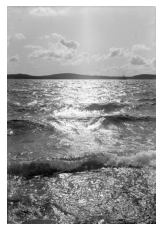

In [35]:
reponse = apis.record('/916105/bhm_photo_UMFA53690_10924')

data = utils.process_CHO_record(reponse)

print('europeana_id: ',data['europeana_id'])
print('image_url: ',data['image_url'])
print('uri: ',data['uri'])
print('dataset_name: ',data['dataset_name'])
print('country: ',data['country'])
print('language: ',data['language'])
print('type: ',data['type'])
print('title: ',data['title'])
print('rights: ',data['rights'])
print('provider: ',data['provider'])
print('provider_lang: ',data['provider_lang'])

try:
    img = utils.url2img(data['image_url'])
    fig,ax = plt.subplots()
    ax.imshow(img)
    ax.axis('off')
except:
    print('Error showing the image')


In [36]:
from pprint import pprint
# print raw metadata
pprint(data['raw_metadata'])

{'apikey': 'api2demo',
 'object': {'about': '/916105/bhm_photo_UMFA53690_10924',
            'aggregations': [{'about': '/aggregation/provider/916105/bhm_photo_UMFA53690_10924',
                              'aggregatedCHO': '/item/916105/bhm_photo_UMFA53690_10924',
                              'edmDataProvider': {'def': ['http://data.europeana.eu/organization/1482250000004500727']},
                              'edmIsShownAt': 'https://digitaltmuseum.se/011014367951',
                              'edmIsShownBy': 'https://mm.dimu.org/image/032sB2cUA2uL?dimension=1200x1200',
                              'edmObject': 'https://mm.dimu.org/image/032sB2cUA2uL?dimension=1200x1200',
                              'edmProvider': {'sv': ['Swedish Open Cultural '
                                                     'Heritage | K-samsök']},
                              'edmRights': {'def': ['http://creativecommons.org/publicdomain/mark/1.0/']},
                              'edmUgc': 'false',

## Using the Entity API


In [37]:
suggest_resp = apis.entity.suggest(
    TYPE = 'agent',
    text = 'leonardo'
)
suggest_resp

{'@context': ['https://www.w3.org/ns/ldp.jsonld',
  'http://www.europeana.eu/schemas/context/entity.jsonld'],
 'type': 'ResultPage',
 'total': 10,
 'items': [{'id': 'http://data.europeana.eu/agent/base/146741',
   'type': 'Agent',
   'isShownBy': {'id': 'http://fotothek.slub-dresden.de/fotos/df/hauptkatalog/0108000/df_hauptkatalog_0108756.jpg',
    'type': 'WebResource',
    'source': 'http://data.europeana.eu/item/2048410/item_I5DUPVW2Q5HT2OQFSVXV7VYODA5P32P6',
    'thumbnail': 'https://api.europeana.eu/api/v2/thumbnail-by-url.json?uri=http%3A%2F%2Ffotothek.slub-dresden.de%2Ffotos%2Fdf%2Fhauptkatalog%2F0108000%2Fdf_hauptkatalog_0108756.jpg&type=IMAGE'},
   'prefLabel': {'en': 'Leonardo da Vinci'},
   'altLabel': {'en': ['Leonardo di ser Piero da Vinci',
     'da Vinci, Leonardo']},
   'dateOfBirth': '1452-04-15',
   'dateOfDeath': '1519-05-02'},
  {'id': 'http://data.europeana.eu/agent/base/147897',
   'type': 'Agent',
   'isShownBy': {'id': 'https://gallica.bnf.fr/iiif/ark:/12148/bpt

In [38]:
retrieve_resp = apis.entity.retrieve(
    TYPE = 'agent',
    IDENTIFIER = 25980
)
retrieve_resp

{'@context': 'http://www.europeana.eu/schemas/context/entity.jsonld',
 'id': 'http://data.europeana.eu/agent/base/25980',
 'type': 'Agent',
 'prefLabel': {'en': 'Vittorio Leonardo',
  'fr': 'Vittorio Léonardo',
  'nl': 'Vittorio Leonardo'},
 'altLabel': {'en': ['Leonardo, Vittorio']},
 'dateOfBirth': ['1947'],
 'biographicalInformation': [{'@language': 'en',
   '@value': 'Vittorio Leonardo, born in Italy in 1947, is a colorist of some famous Franco-Belgian comics series. He worked for Spirou magazine and founded the Studio Leonardo, which continued his work.'},
  {'@language': 'fr',
   '@value': "Vittorio Leonardo (né à Naples le 25 novembre 1938) est un coloriste et dessinateur de bande dessinée belge d'origine italienne.Il a commencé sa carrière comme photograveur aux éditions Dupuis.En 1968, il crée le Studio Leonardo, qui réalise la mise en couleurs de différentes séries du journal Spirou, telles que Boule et Bill, Cédric, Les Femmes en blanc, Gaston, Lucky Luke, le Marsupilami, Na